<a href="https://colab.research.google.com/github/jananilakshminarayanan/DA-DS-projects/blob/main/Janani_vahanbima_clv_prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analytics Vidhya - January 2023 - JOB-A-THON
### VahanBima - ML Model to predict CLTV of customers

**Project Aim:** To find Customer Lifetime value of an Insurance company customers, so that they can be prioritized accordingly.

**Solution Approach:**  Since the target/output variable CLTV is clearly a continous numeric variable regression model is applied on the dataset.
 Feature Selection done using Pearson’s Correlation Coefficient: f_regression() as the output variable is numeric and most of the meaningful input variables were also numeric. Inorder to aid feature selection methods all categorical data has been transformed to numeric data.	Tried out numerous regression models such as XgBoost, Linear regressor, Decision tree regressor and k-means regressor to test the model performance in R2 _score metric. Since the LinearRegressor model gave the maximum performance metric of R2_score chose the model and predicted Customer LifeTime Value using the said model . Stored the customer id and cltv value in a separate csv file called final_submission.


### Explorative Data Analysis

In [ ]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load train and test datasets
train = pd.read_csv("train_BRCpofr.csv")
test = pd.read_csv("test_koRSKBP.csv")

In [ ]:
# Show first 10 rows in train dataset
train.head(10)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
5,6,Male,Rural,High School,More than 10L,1,1,0,1,C,Gold,348768
6,7,Female,Rural,Bachelor,5L-10L,1,6,0,More than 1,A,Gold,238920
7,8,Female,Urban,High School,5L-10L,0,0,5473,More than 1,A,Silver,64128
8,9,Female,Urban,High School,5L-10L,1,3,6105,More than 1,A,Gold,94536
9,10,Male,Rural,High School,More than 10L,1,6,0,More than 1,A,Platinum,99060


In [ ]:
# Show first 10 rows in test dataset
test.head(10)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver
5,89398,Female,Rural,High School,2L-5L,1,6,3697,More than 1,A,Gold
6,89399,Male,Urban,Bachelor,5L-10L,0,6,0,1,A,Platinum
7,89400,Female,Urban,High School,2L-5L,0,2,0,More than 1,B,Gold
8,89401,Male,Rural,Bachelor,5L-10L,0,4,0,1,A,Silver
9,89402,Male,Urban,High School,2L-5L,0,6,5581,More than 1,C,Gold


In [ ]:
# explore the dataset
train.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [ ]:
# find out datatypes of columns
train.dtypes

id                 int64
gender            object
area              object
qualification     object
income            object
marital_status     int64
vintage            int64
claim_amount       int64
num_policies      object
policy            object
type_of_policy    object
cltv               int64
dtype: object

### Data Visualization

In [ ]:
# find out the effects various features have on our target variable - CLTV

<function matplotlib.pyplot.show(close=None, block=None)>

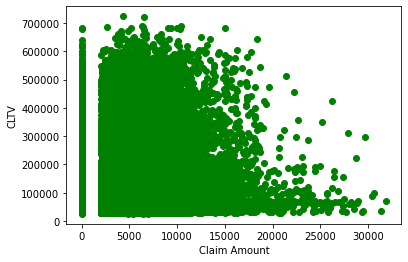

In [ ]:
# plot a scatter plot to find the relationship between claim_amount and cltv
plt.scatter(train['claim_amount'], train['cltv'], color='green')
plt.xlabel('Claim Amount')
plt.ylabel('CLTV')
plt.show

In [ ]:
# From the above graph its clear that claim_amount is inversely related to CLTV
# Hence claim_amount should be selected as one of features

<function matplotlib.pyplot.show(close=None, block=None)>

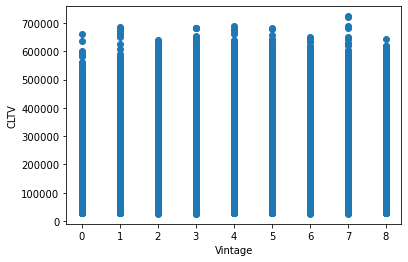

In [ ]:
# plot a scatter plot to find the relationship between vintage and cltv
plt.scatter(train['vintage'], train['cltv'])
plt.xlabel('Vintage')
plt.ylabel('CLTV')
plt.show

In [ ]:
# from above graph it deosnt look like there is any solid relationship between vintage and cltv
# hence vintage need not ben an impportant feature

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x000002C76E019940>
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\lib\site-packages\matplotlib\transforms.py", line 222, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 


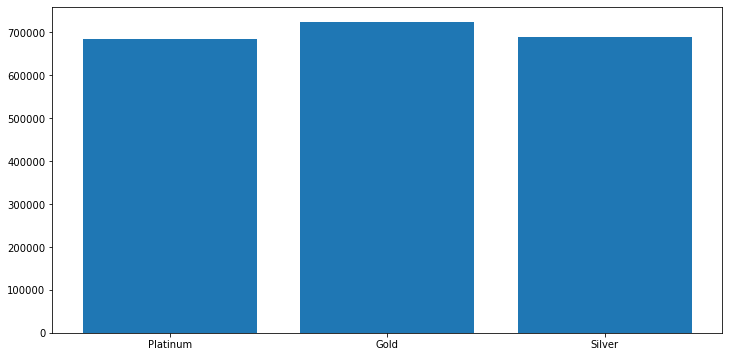

In [ ]:
# plot a bar graph that shows relationship between CLTV and type_of_policy
fig = plt.figure(figsize = (12,6))
plt.bar(train['type_of_policy'], train['cltv'])
plt.show()

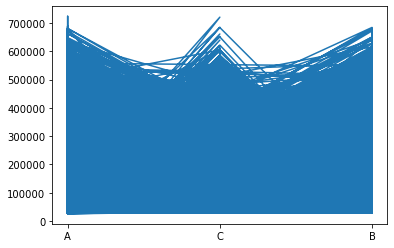

In [ ]:
# plot a line graph that shows relationship between CLTV and policy
plt.plot(train['policy'],train['cltv'])
plt.show()

### Data Pre Processing

In [ ]:
# Since target variable is a continous numeric variable we will be using regression methods
# hence in order to aid feature selection methods transform categorical data to numeric datatypes

In [ ]:
# find out distinct values of each categorical column and replace them with numerical values

In [ ]:
train['gender'].replace(['Male','Female'],[0,1], inplace=True)

In [ ]:
train['area'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
train['area'].replace(['Urban', 'Rural'],[0,1], inplace=True)

In [ ]:
train['qualification'].unique()

array(['Bachelor', 'High School', 'Others'], dtype=object)

In [ ]:
train['qualification'].replace(['Bachelor', 'High School', 'Others'],[2,1,0], inplace=True)

In [ ]:
train['income'].unique()

array(['5L-10L', 'More than 10L', '2L-5L', '<=2L'], dtype=object)

In [ ]:
train['income'].replace([ 'More than 10L','5L-10L', '2L-5L', '<=2L'],[3,2,1,0], inplace=True)

In [ ]:
train['num_policies'].unique()

array(['More than 1', '1'], dtype=object)

In [ ]:
train['num_policies'].replace(['More than 1', '1'],[1,0], inplace=True)

In [ ]:
train['policy'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
train['policy'].replace(['A', 'B', 'C'],[0,1,2], inplace=True)

In [ ]:
train['type_of_policy'].unique()

array(['Platinum', 'Gold', 'Silver'], dtype=object)

In [ ]:
train['type_of_policy'].replace(['Platinum', 'Gold', 'Silver'],[2,1,0], inplace=True)

In [ ]:
train.dtypes

id                int64
gender            int64
area              int64
qualification     int64
income            int64
marital_status    int64
vintage           int64
claim_amount      int64
num_policies      int64
policy            int64
type_of_policy    int64
cltv              int64
dtype: object

In [ ]:
train.isna().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

### feature selection using Pearson’s Correlation Coefficient: f_regression()

#### Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables(features) with the output variable(target) CLTV. The correlation coefficient has values between -1 to 1.A value closer to 0 implies weaker correlation (exact 0 implying no correlation). A value closer to 1 implies stronger positive correlation. A value closer to -1 implies stronger negative correlation. We will only select features which has quantifiable correlation  values with the output variable.



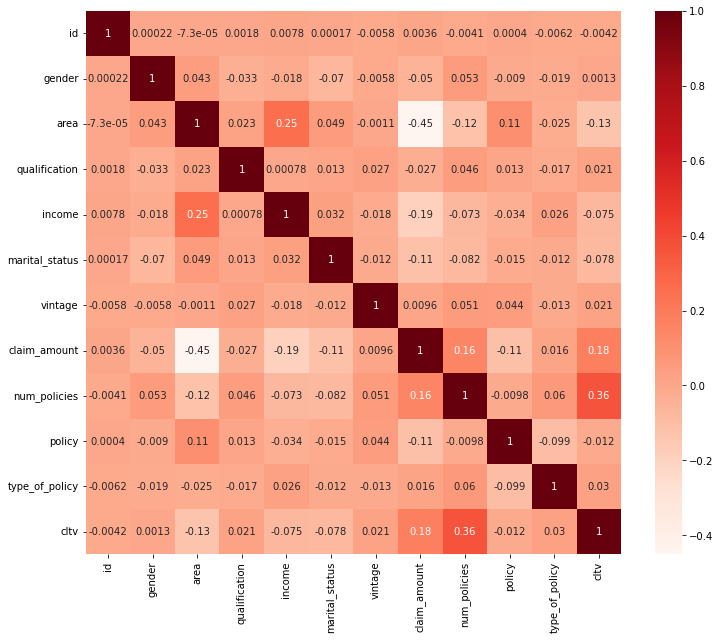

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


#### from the above heatmap it can clearly be seen that only the features num_policies,claim_amount ,area, income and marital_status have atleast milder levels of influence over traget variable. Hence we will sellect these three as features first and build our regression model

### Build Regression Model

In [ ]:
# build features and target dataset
X = train[['num_policies','claim_amount','area','income','marital_status']]
y = train['cltv']

In [ ]:
# using standard scaler normalize or standardoze the input/feature values for better regression results
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

In [ ]:
# split dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.2)

#### Using Linear Regressor

In [ ]:
# import linear regression algorthm and build a model using the same. fit the model with train data
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# predict values using test set
y_pred = linreg.predict(X_test)

In [ ]:
# evaluate model performance using r2_score
from sklearn.metrics import r2_score
print("R2 score is: ",r2_score(y_test,y_pred))

R2 score is:  0.15222533684766248


### Using the ML model built make predictions in the test dataset

In [ ]:
test['gender'].replace(['Male','Female'],[0,1], inplace=True)

In [ ]:
test['area'].replace(['Urban', 'Rural'],[0,1], inplace=True)

In [ ]:
test['qualification'].replace(['Bachelor', 'High School', 'Others'],[2,1,0], inplace=True)

In [ ]:
test['income'].replace([ 'More than 10L','5L-10L', '2L-5L', '<=2L'],[3,2,1,0], inplace=True)

In [ ]:
test['num_policies'].replace(['More than 1', '1'],[1,0], inplace=True)

In [ ]:
test['policy'].replace(['A', 'B', 'C'],[0,1,2], inplace=True)

In [ ]:
test['type_of_policy'].replace(['Platinum', 'Gold', 'Silver'],[2,1,0], inplace=True)

In [ ]:
test.dtypes

id                int64
gender            int64
area              int64
qualification     int64
income            int64
marital_status    int64
vintage           int64
claim_amount      int64
num_policies      int64
policy            int64
type_of_policy    int64
dtype: object

In [ ]:
x_test = test[['num_policies','claim_amount','area','income','marital_status']]

In [ ]:
x_test1 = scaler.fit_transform(x_test)

In [ ]:
# make prediction on test data using model already built
y_pred = linreg.predict(x_test1)

In [ ]:
# assign predictions to a new column called cltv in test dataset
test['cltv'] = y_pred.astype('int')

In [ ]:
test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,89393,1,1,1,2,0,6,2134,1,1,0,110332
1,89394,1,0,1,1,0,4,4102,1,0,2,126536
2,89395,0,1,1,2,1,7,2925,1,1,1,106238
3,89396,1,1,2,3,1,2,0,1,1,0,95328
4,89397,1,0,1,1,0,5,14059,1,1,0,153941


### Creating Final submission csv file

In [ ]:
#creating the final submission file
final_submission = test[['id','cltv']]
final_submission.to_csv("final_submission1.csv",index=False)